Let's take a closer look again on our PC versus Mac menu bar example. Here are the measurements for the first experiments (between-subject, randomized) (we first import some stuff to make plots look nicer etc. press  shift enter in the next cell to execute it).

In [3]:
%pylab inline
import matplotlib.pyplot as plt
#use a nicer plotting style
plt.style.use(u'fivethirtyeight')
print(plt.style.available)

#change figure size
pylab.rcParams['figure.figsize'] = (10, 6)


Populating the interactive namespace from numpy and matplotlib
[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


Now Lets try to calculate the mean ... you can just use mean()

In [5]:
windows = [625, 480, 621, 633]
mac = [647, 503, 559, 586]

print std(windows)
print std(mac)

63.511317889
51.8139701239


hmmm ... there seems to be a difference, but it's not so big. Let's use point plots to check the data.




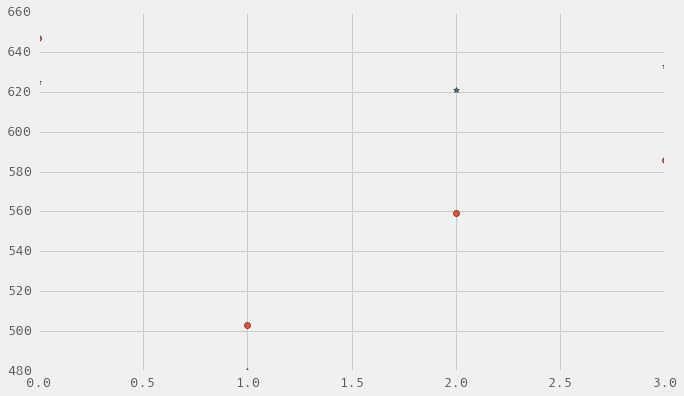

In [6]:
plot(windows,"*")
plot(mac,"o")

Let's use boxplots to explore the windows and mac data we recorded so far.
use the command boxplot to plot them.
You can also combine the 2 datasets to place them in one plot using data = [windows,mac]

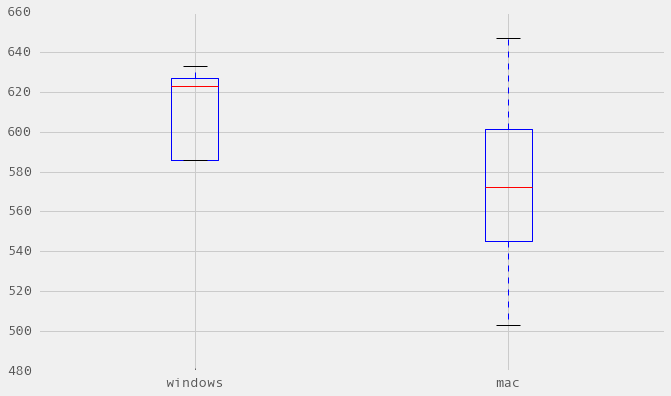

In [8]:
data = [windows,mac]
boxplot(data)
xticks([1,2],['windows','mac'])
#save the plot to a file
savefig("boxplot.pdf")

hmm ... doesn't look siginificant. yet, just to make sure, let's apply a t-test. Remember t-tests are for comparing only 2 means with eachother NOT more (also assumptions are that samples are independent, normally distributed and the variance is the same!) 

In [9]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import scipy.stats as stats
#onesided t-test
ttest_ind(mac,windows)

Ttest_indResult(statistic=-0.33810258358163742, pvalue=0.74680239857459685)

In [10]:
#two sided t-test
ttest_rel(mac,windows)

Ttest_relResult(statistic=-0.71305042851453826, pvalue=0.52727545422603439)

Ok... doesn't look significant. So we should record more data ;)

In [11]:
more_win = [625, 480, 621, 633,694,599,505,527,651,505]
more_mac = [647, 503, 559, 586, 458, 380, 477, 409, 589,472]

Ok ... let's caluclate the means and plot the data.

now perform the t-test (two sided is best). What do you think?

what to do if we have more than 2 samples? (assumming we introduce a 3rd experimental setup where the menu bar is at the bottom of the screen) we need to use ANOVA (again assuming between-subject design, normal distributions etc.) Use the function stats.f_oneway

In [12]:
more_win = [625, 480, 621, 633,694,599,505,527,651,505]
more_mac = [647, 503, 559, 586, 458, 380, 477, 409, 589,472]
more_bottom = [485,436, 512, 564, 560, 587, 391, 488, 555, 446]

In [13]:
stats.f_oneway(more_win, more_mac, more_bottom)

F_onewayResult(statistic=3.6909472287945335, pvalue=0.038278814395010151)

([<matplotlib.axis.XTick at 0x10a716990>,
 <a list of 3 Text xticklabel objects>)

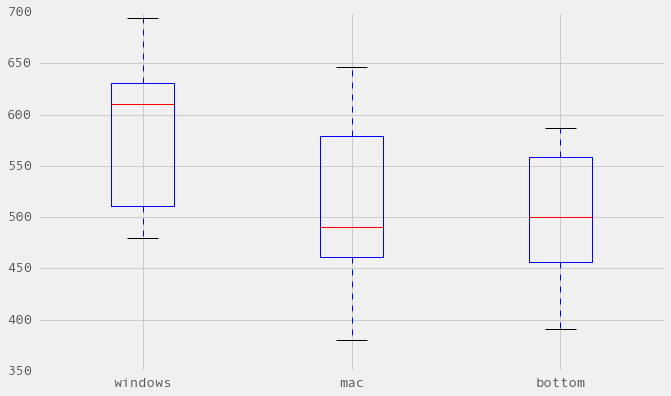

In [15]:
boxplot([more_win, more_mac, more_bottom])
xticks([1,2,3],['windows','mac', 'bottom'])



usually we don't define all data from the command prompt, but we read in files from disk.

In [16]:
import pandas as pd
menu_data=pd.read_csv("./data/menu_all.csv")

In [17]:
menu_data.describe()

,mac,windows,bottom
count,10.000000,10.000000,10.000000
mean,508.000000,584.000000,502.400000
std,85.332031,73.644793,64.668728
min,380.000000,480.000000,391.000000
25%,461.500000,510.500000,455.750000
50%,490.000000,610.000000,500.000000
75%,579.250000,631.000000,558.750000
max,647.000000,694.000000,587.000000


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x10d07a210>,
 'caps': [<matplotlib.lines.Line2D at 0x10d087150>,
 'fliers': [<matplotlib.lines.Line2D at 0x10d093450>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10d087dd0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10d07a410>,
  <matplotlib.lines.Line2D at 0x10d0c3350>]}

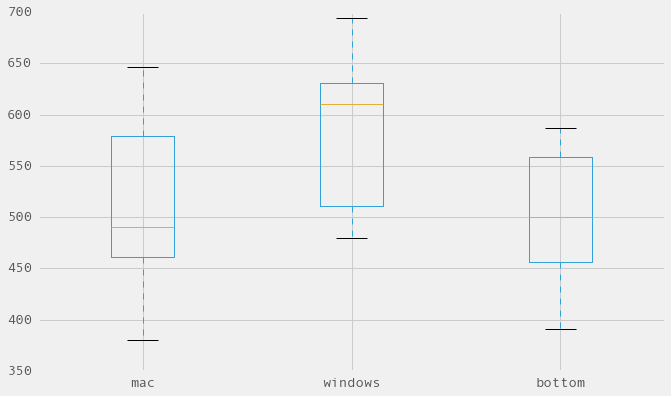

In [18]:
menu_data.boxplot()